#  Coding Assignment #3 - Fraud Detection Models

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Paul's Code


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

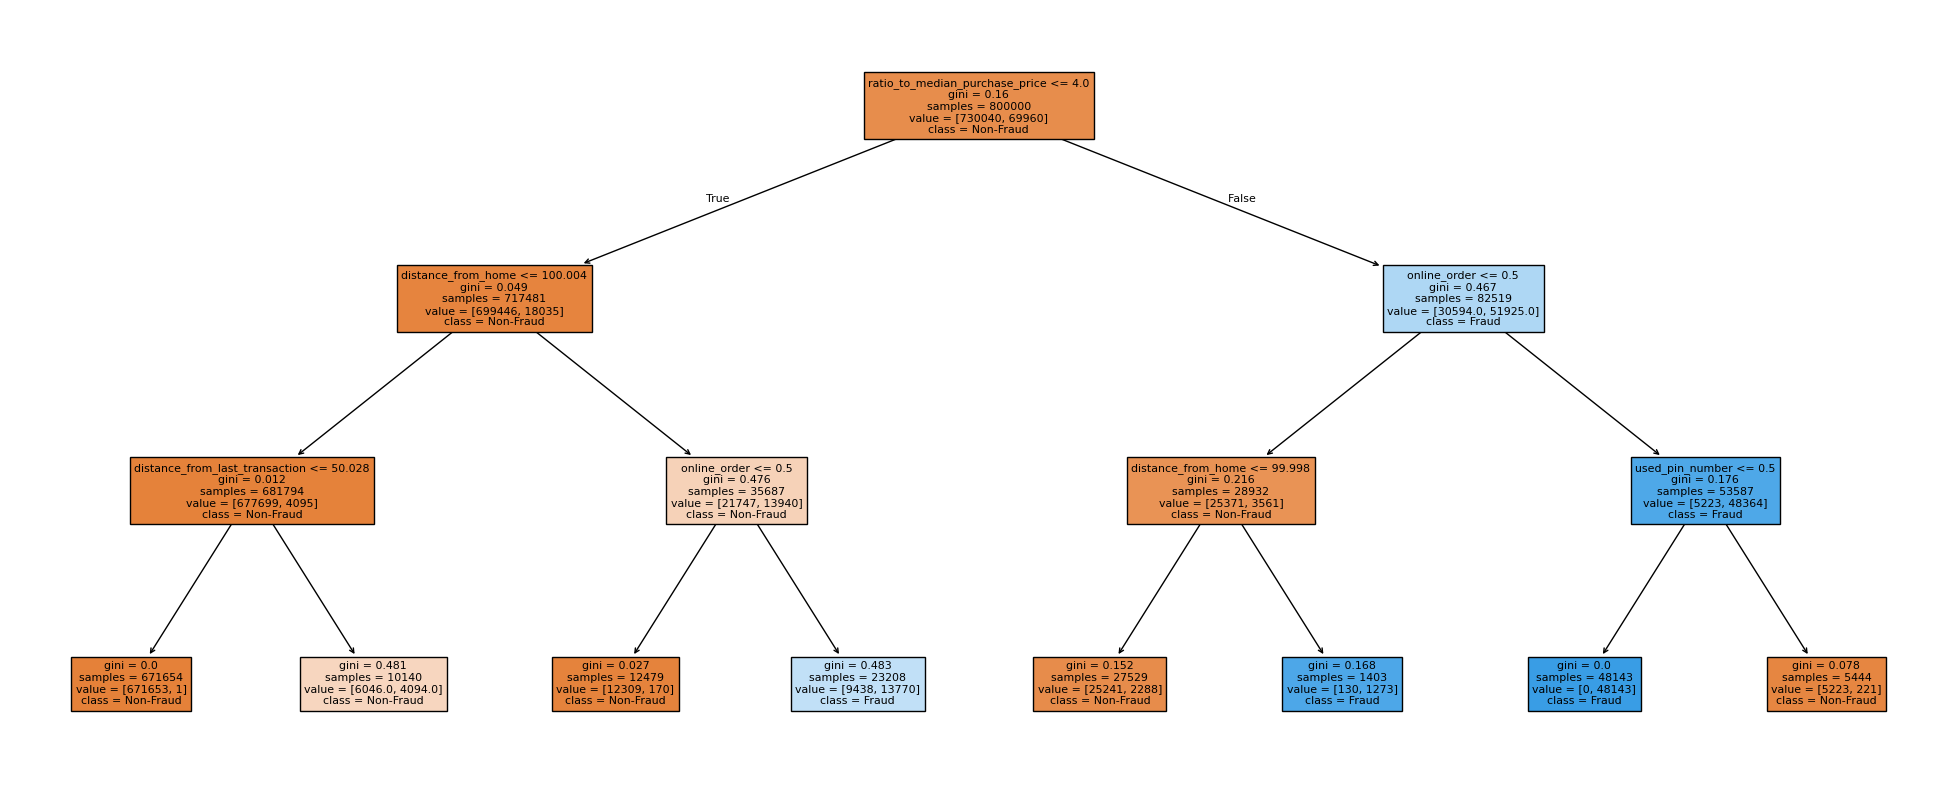

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier and a random forest classifier
model1 = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = model1.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred1)
confusion1 = confusion_matrix(y_test, y_pred1)
classification_rep1 = classification_report(y_test, y_pred1)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy1:.2f}")
print("Confusion Matrix:")
print(confusion1)
print("Classification Report:")
print(classification_rep1)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model1,
          filled=True,
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

# Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points

## Submission Guidelines
- Submit your work in a Jupyter Notebook or as a Python script with comments explaining your steps. You can also include your discussion in the notebook, as comments in your script, or in a separate text file.
- Ensure your plots and tables are clearly labeled and legible.

## Notes
- Be sure to demonstrate your understanding of the task and the models.




Let's do a quick describe of the dataset columns.


       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                       

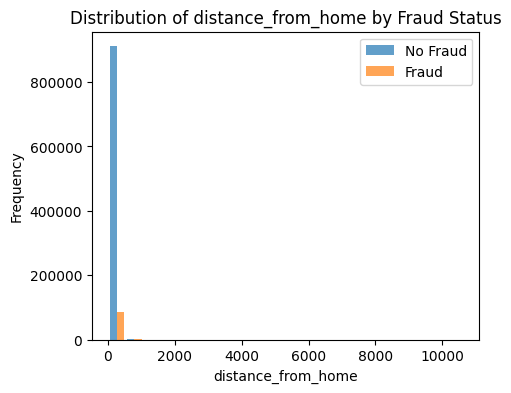

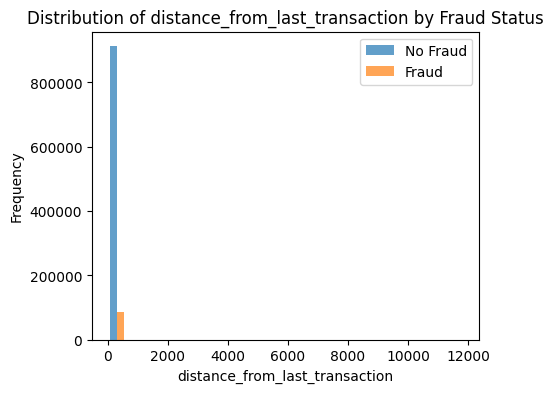

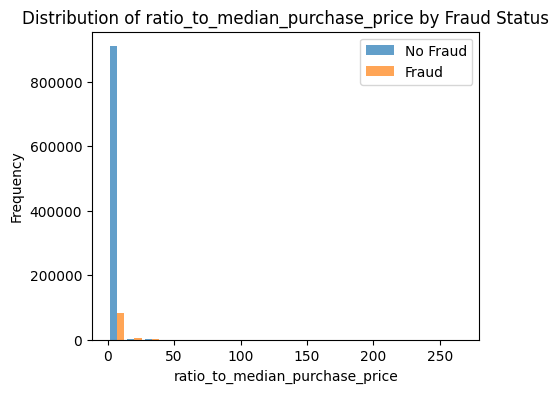

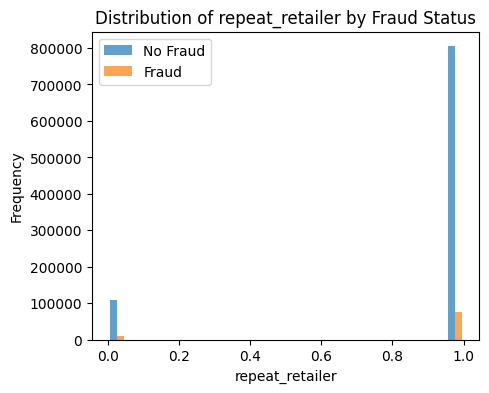

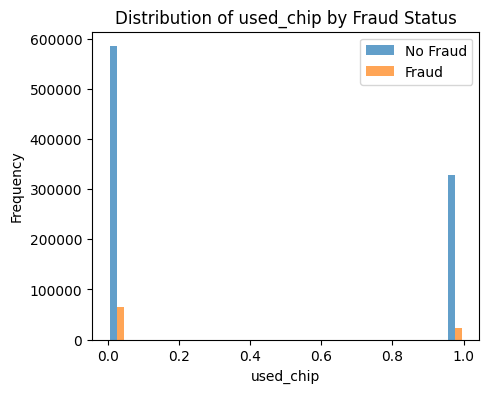

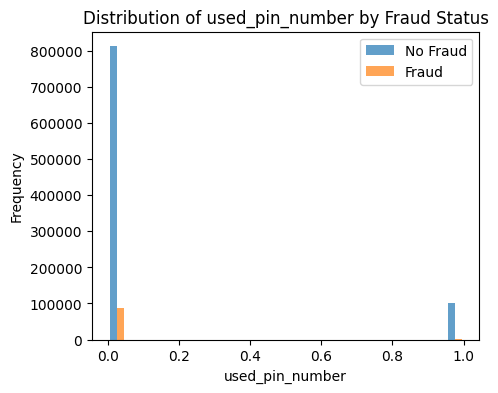

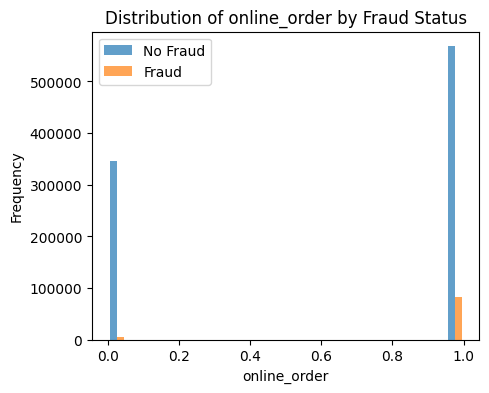


--- Heatmap of Correlation Matrix ---


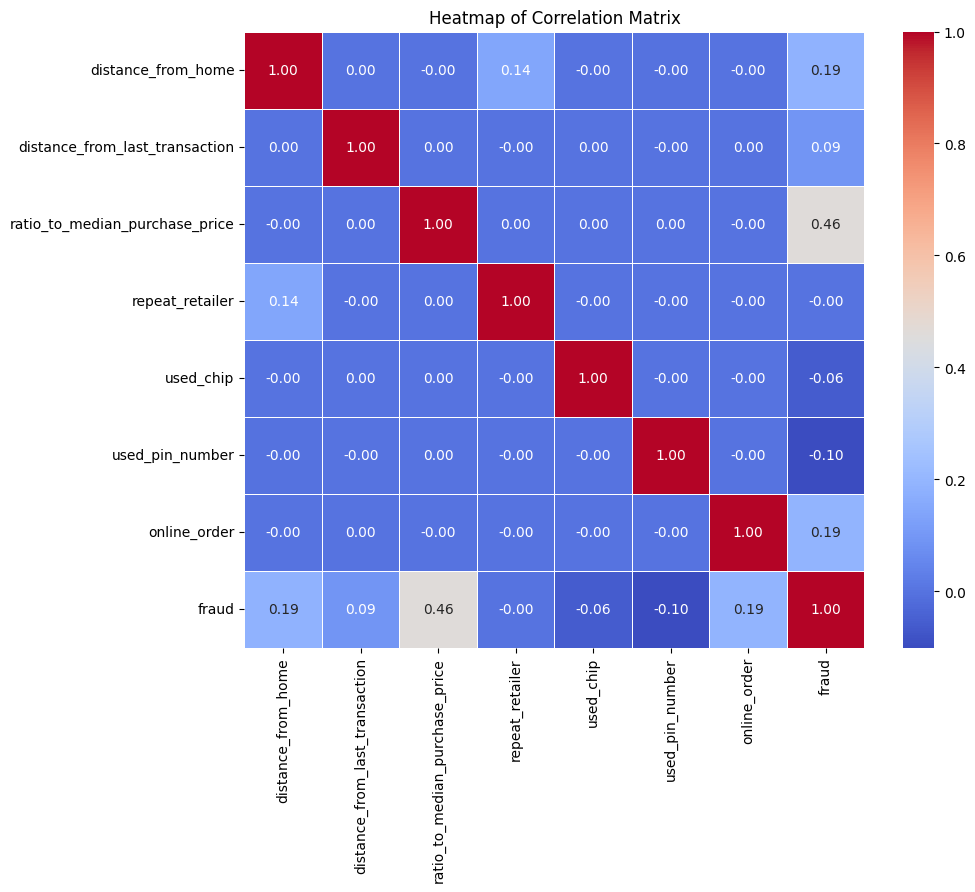



Half the charts display very skewed data (distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price)
The other half presents binary yes or no (1 or 0) data.
Repeat_retailer, used_chip, used_pin_number, online_order, do not seem to be particulary good predictor of fraud
 but the correlation matrix hints at ratio_to_median_purchase_price being a great predictor with a high correlation 0.46 to fraud.

--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2   

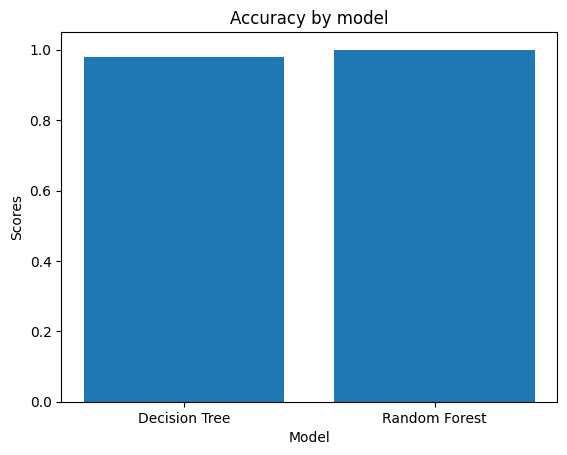

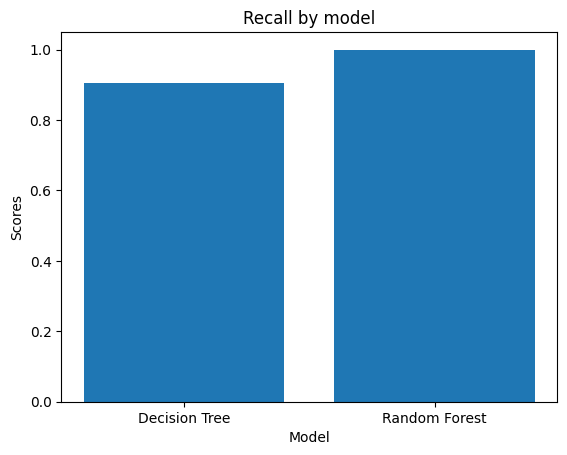

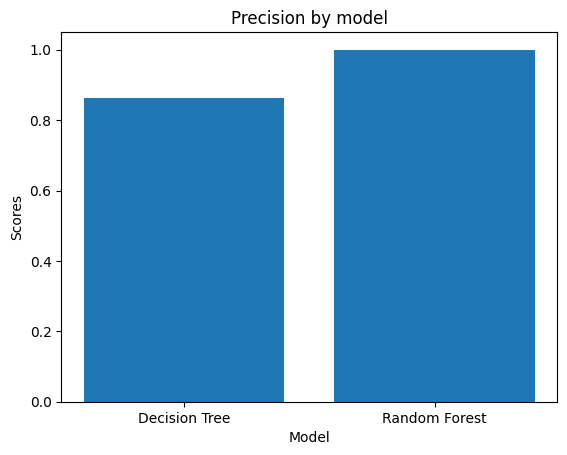


Combined in one chart:


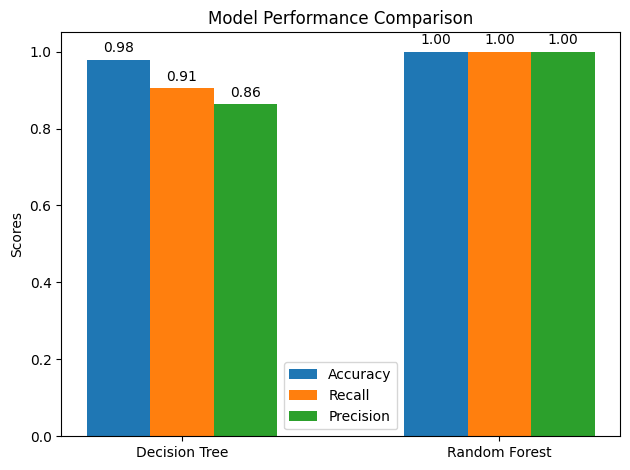


Model Accuracy Analysis:


High accuracy of 100% suggests the Random Forest model is more effective in classifying transactions as fraudulent or non-fraudulent even when the Decision Tree model performed as well at 98%.
Yet we need to be wary of overfitting. Indeed an accuracy of 100% is often a sign of overfitting which could cause the model to perform poorly with out of sample data or live data.

Confusion Matrix Analysis


Low number of false positives (0) and false negatives (2) compared to true positives and negatives.
Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

Classification Report Insights


High precision (1.00) for class 0.
Recall is also high (1.00) for class 0.
F1-score of 1.00 is robust, indicating a balanced model considering both precision and recall.

Overall Evaluation


The Random Forest model with 100 estimators (remember n_estimator=1 is equivalent to a single Decision Tree) shows excellent performance 
 and 

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns


# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)


##TASK: DATASET EXPLORATION Explore the dataset (data variable) by displaying basic statistics and visualizations.
##      Show data exploration through charts and graphs.
##      Please provide commentary that interprets the significance of the output.
##      Identify key features that might influence credit risk prediction.
##      What are the key features that you think will influence the model.

print("\n")
print("Let's do a quick describe of the dataset columns.")
print("\n")
print(data.describe())

print("\n")
print("At first glance, it seems like we are dealing with data that has very different distributions.")

print("\n")
print("Let's print the column headers and take a quick look at the first few rows.")
print("\n")
print(data.head())

print("\n")
print("Let's now generate quickly the bar charts that compare the distribution of each column compared in the case of Fraud and No Fraud.")


def compare_with_fraud(df, column_name):
    plt.figure(figsize=(5, 4))

    if df[column_name].dtype == 'object':  # Categorical column
        default_counts = df.groupby(['fraud', column_name]).size().unstack()
        default_counts.plot(kind='bar', stacked=True)
        plt.title(f'{column_name} vs. Fraud Status')
        plt.xlabel(column_name)
        plt.ylabel('Count')

    else:  # Numerical column
        plt.hist([df[df['fraud'] == 0][column_name], df[df['fraud'] == 1][column_name]],
                 bins=20, label=['No Fraud', 'Fraud'], alpha=0.7)
        plt.title(f'Distribution of {column_name} by Fraud Status')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.legend()
    plt.show()


print("\n")
#BR: Iterate through columns (excluding 'default' itself)
for col in data.columns:
    if col not in ['fraud']:
        compare_with_fraud(data, col)


# Heatmap visualization
print("\n--- Heatmap of Correlation Matrix ---")
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


print("\n")
print("Half the charts display very skewed data (distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price)")
print("The other half presents binary yes or no (1 or 0) data.")
print("Repeat_retailer, used_chip, used_pin_number, online_order, do not seem to be particulary good predictor of fraud")
print(" but the correlation matrix hints at ratio_to_median_purchase_price being a great predictor with a high correlation 0.46 to fraud.")

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Reprinting the summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

##TASK: Model Building
##      Calculate and interpret the precision and recall for the Random Forest model.
##      Generate and interpret the confusion matrix for the Random Forest model.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model1 = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = model1.predict(X_test)


##TASK: Model Evaluation
##      Build a Random Forest model using the provided dataset.

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
confusion1 = confusion_matrix(y_test, y_pred1)
classification_rep1 = classification_report(y_test, y_pred1)

# Initialize a Random Forest classifier and assign 100 forests (becuase if only 1 then it would be equivalent to a single decision tree model)
model2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = model2.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
confusion2 = confusion_matrix(y_test, y_pred2)
classification_rep2 = classification_report(y_test, y_pred2)

##TASK: Comparative Analysis:
##      Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
##      Visualize the comparison using a bar chart.

# Print the results
print("\n--- Decision Tree Model Performance Metrics ---")
print(f"Accuracy: {accuracy1:.2f}")
print("Confusion Matrix:")
print(confusion1)
print("Classification Report:")
print(classification_rep1)
print(f"Recall: {recall1:.3f}")
print(f"Precision: {precision1:.3f}")

print("\n--- Random Forest Model Performance Metrics ---")
print(f"Accuracy: {accuracy2:.2f}")
print("Confusion Matrix:")
print(confusion2)
print("Classification Report:")
print(classification_rep2)
print(f"Recall: {recall2:.3f}")
print(f"Precision: {precision2:.3f}")


print("\nVisualization with simple bar charts:")
pltx1 = ['Decision Tree', 'Random Forest']
plty1 = [accuracy1,accuracy2]
plt.bar(pltx1, plty1)
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title(f'Accuracy by model')
plt.show()

pltx2 = ['Decision Tree', 'Random Forest']
plty2 = [recall1, recall2]
plt.bar(pltx2, plty2)
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title(f'Recall by model')
plt.show()

pltx3 = ['Decision Tree', 'Random Forest']
plty3 = [precision1, precision2]
plt.bar(pltx3, plty3)
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title(f'Precision by model')
plt.show()

print("\nCombined in one chart:" )
# Data for the bar chart
models = ['Decision Tree', 'Random Forest']
accuracy_scores = [accuracy1, accuracy2]
recall_scores = [recall1, recall2]
precision_scores = [precision1, precision2]

# Create the bar chart
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar(x + width, precision_scores, width, label='Precision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

##TASK: Reflection and Discussion:
##      Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.
print("\nModel Accuracy Analysis:")
print("\n")
print("High accuracy of 100% suggests the Random Forest model is more effective in classifying transactions as fraudulent or non-fraudulent even when the Decision Tree model performed as well at 98%.")
print("Yet we need to be wary of overfitting. Indeed an accuracy of 100% is often a sign of overfitting which could cause the model to perform poorly with out of sample data or live data.")
print("\nConfusion Matrix Analysis")
print("\n")
print("Low number of false positives (0) and false negatives (2) compared to true positives and negatives.")
print("Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.")
print("\nClassification Report Insights")
print("\n")
print("High precision (1.00) for class 0.")
print("Recall is also high (1.00) for class 0.")
print("F1-score of 1.00 is robust, indicating a balanced model considering both precision and recall.")
print("\nOverall Evaluation")
print("\n")
print("The Random Forest model with 100 estimators (remember n_estimator=1 is equivalent to a single Decision Tree) shows excellent performance ")
print(" and improves over the Decision Tree Model with depth of 3 in identifying fraud which is already excellent.")




# Extra Credit: Advanced Model Enhancement and Evaluation

## Objective
Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.

## Tasks
1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.
2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.
3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.


In [ ]:
!pip install imbalanced-learn


Balancing the Data using Random Undersampling

Let's reprint the charts that compare the distribution of each column before and after resampling.
distance_from_home before resampling


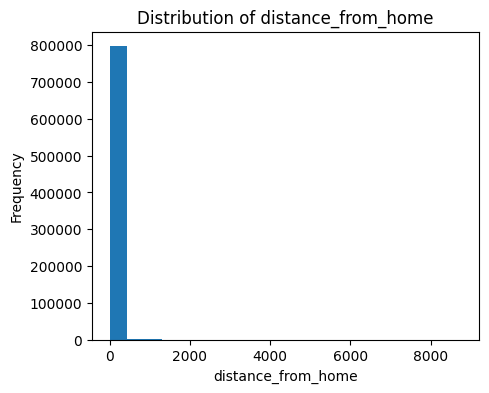

distance_from_home after resampling


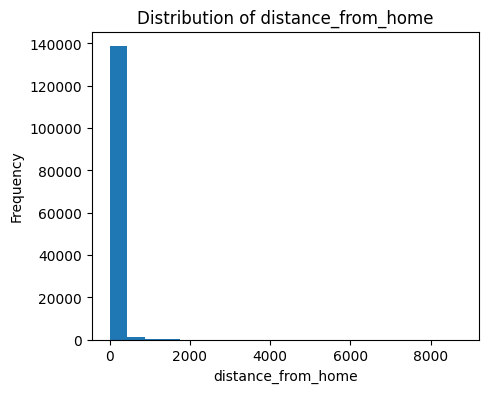

distance_from_last_transaction before resampling


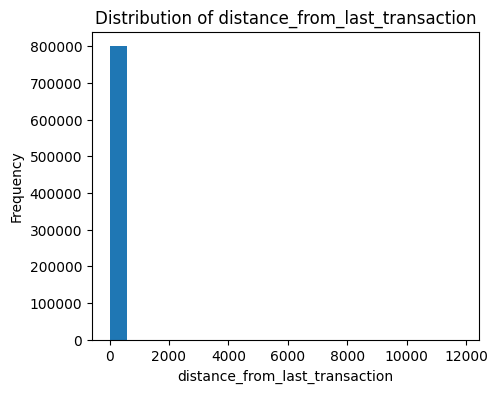

distance_from_last_transaction after resampling


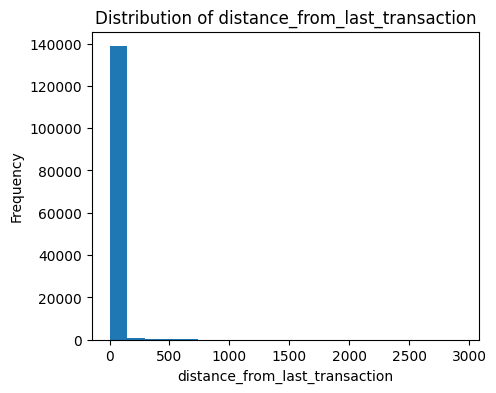

ratio_to_median_purchase_price before resampling


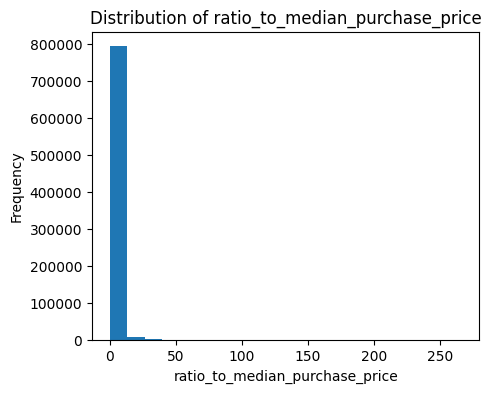

ratio_to_median_purchase_price after resampling


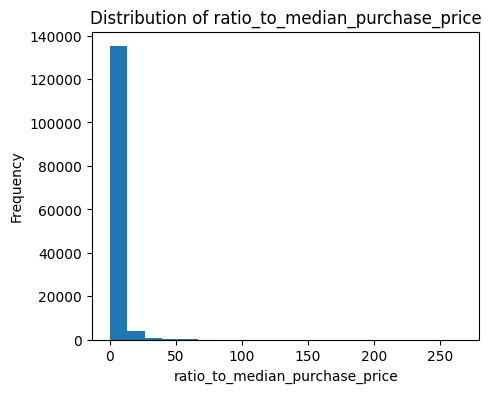

repeat_retailer before resampling


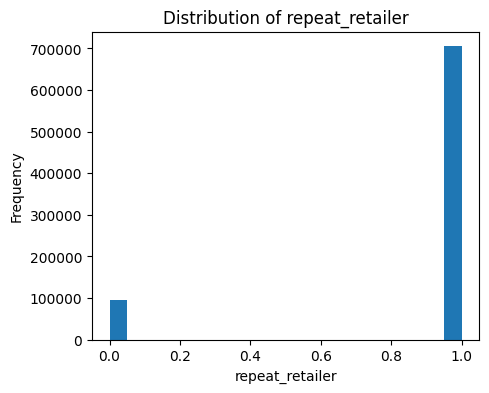

repeat_retailer after resampling


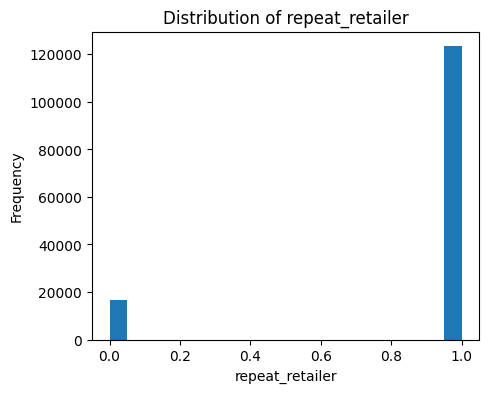

used_chip before resampling


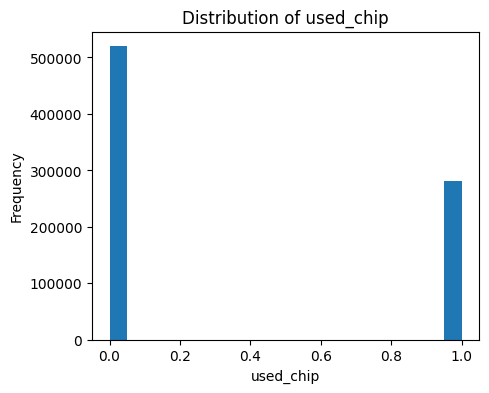

used_chip after resampling


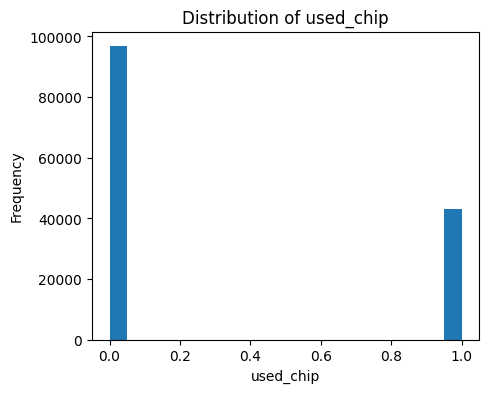

used_pin_number before resampling


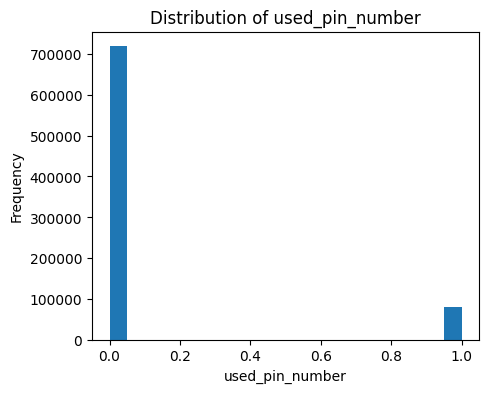

used_pin_number after resampling


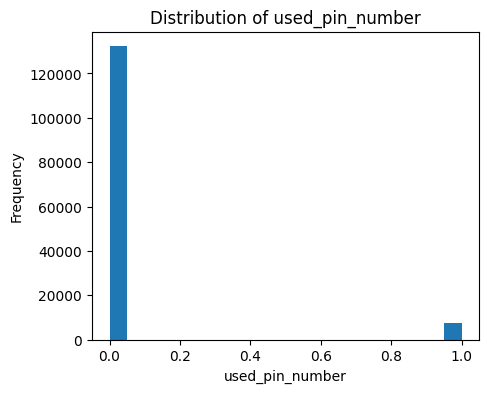

online_order before resampling


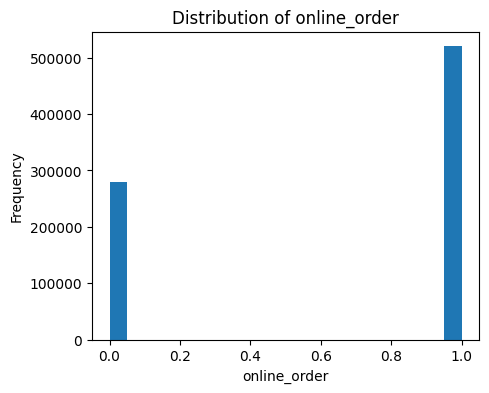

online_order after resampling


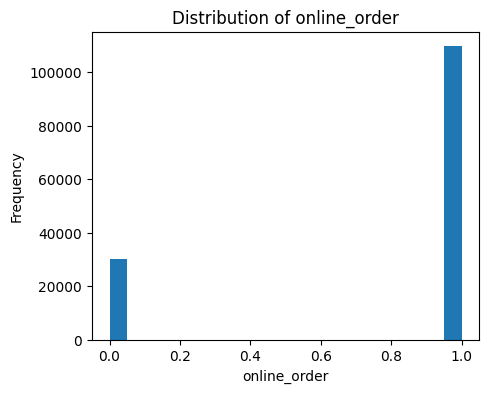


Using the rebalanced data, let's create the new predictions.

--- Random Forest Model Performance Metrics (Balanced Data) ---
Accuracy: 1.00
Confusion Matrix:
[[182540     17]
 [     1  17442]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

Recall: 1.000
Precision: 0.999

--- 5-Fold Cross-Validation ---
Cross-Validation Scores: [1.         1.         1.         0.9998928  0.99996427]
Average Cross-Validation Score: 1.00

There is now more false positives (14) and false negatives (1) compared to previous sample but still much less than true positives and negatives.

--- Feature Importance Analysis ---

Feature Importance Table:
                          Feature  Importance
2  ratio_to_med

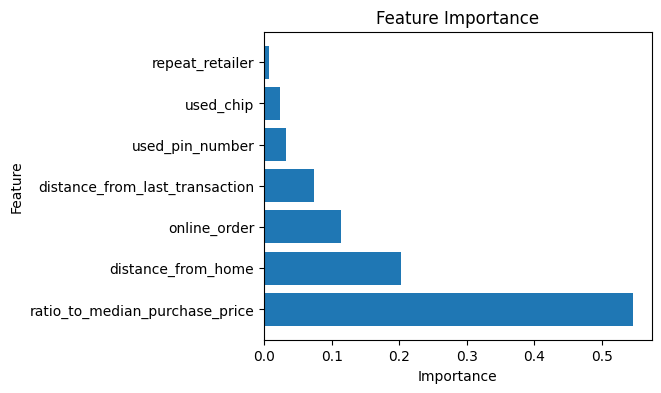


We believed feature `ratio_to_median_purchase_price` to be an important predictor due to its high correlation with Fraud.
Now we can see it on top of the list of important features, followed by `distance_from_home` then `online_order`.


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score


##TASK: 1. Balancing the Data:
##      Utilize a technique like SMOTE or undersampling to balance the dataset.
##      Rebuild the Random Forest model using the balanced dataset.



print("\nBalancing the Data using Random Undersampling")
resampler = RandomUnderSampler()
#resampler = SMOTE())
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

print("\nLet's reprint the charts that compare the distribution of each column before and after resampling.")

def create_histograms(df, column_name):
    plt.figure(figsize=(5, 4))
    plt.hist(df[column_name], bins=20)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

for col in data.columns:
    if col not in ['fraud']:
        print(f'{col} before resampling')
        create_histograms(X_train, col)
        print(f'{col} after resampling')
        create_histograms(X_train_resampled, col)



# Rebuild the Random Forest model with balanced data
print("\nUsing the rebalanced data, let's create the new predictions.")
model2_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
model2_balanced.fit(X_train_resampled, y_train_resampled)

y_pred2_balanced = model2_balanced.predict(X_test)

accuracy2_balanced = accuracy_score(y_test, y_pred2_balanced)
recall2_balanced = recall_score(y_test, y_pred2_balanced)
precision2_balanced = precision_score(y_test, y_pred2_balanced)
confusion2_balanced = confusion_matrix(y_test, y_pred2_balanced)
classification_rep2_balanced = classification_report(y_test, y_pred2_balanced)

print("\n--- Random Forest Model Performance Metrics (Balanced Data) ---")
print(f"Accuracy: {accuracy2_balanced:.2f}")
print("Confusion Matrix:")
print(confusion2_balanced)
print("Classification Report:")
print(classification_rep2_balanced)
print(f"Recall: {recall2_balanced:.3f}")
print(f"Precision: {precision2_balanced:.3f}")



##TASK: 2. Cross-Validation:
##      Implement 5-fold cross-validation for the Random Forest model.
##      Analyze the model's performance and stability based on cross-validation results.

print("\n--- 5-Fold Cross-Validation ---")
cv_scores = cross_val_score(model2_balanced, X_train_resampled, y_train_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores):.2f}")

print("\nThere is now more false positives (14) and false negatives (1) compared to previous sample but still much less than true positives and negatives.")

##TASK: 3. Feature Importance Analysis:
##      Determine feature importance using the Random Forest model.
##      Present the feature importances in a table and a graph.
print("\n--- Feature Importance Analysis ---")
importances = model2_balanced.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance Table:")
print(feature_importance_df)

plt.figure(figsize=(5, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

print("\nWe believed feature `ratio_to_median_purchase_price` to be an important predictor due to its high correlation with Fraud.")
print("Now we can see it on top of the list of important features, followed by `distance_from_home` then `online_order`.")
